In [6]:
import pandas as pd
import matplotlib as mpl
import seaborn as sns

In [7]:
url_client_prof = 'https://raw.githubusercontent.com/data-bootcamp-v4/lessons/refs/heads/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_demo.txt'

url_dig_fprint_1 = 'https://raw.githubusercontent.com/data-bootcamp-v4/lessons/refs/heads/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_web_data_pt_1.txt'

url_dig_fprint_2 = 'https://raw.githubusercontent.com/data-bootcamp-v4/lessons/refs/heads/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_web_data_pt_2.txt'

url_exp_rost = 'https://raw.githubusercontent.com/data-bootcamp-v4/lessons/refs/heads/main/5_6_eda_inf_stats_tableau/project/files_for_project/df_final_experiment_clients.txt'

In [8]:
# DF client profiles
client_prof = pd.read_csv(url_client_prof)

# DF digital Footprints merge
digital_fprint_1 = pd.read_csv(url_dig_fprint_1)
digital_fprint_2 = pd.read_csv(url_dig_fprint_2)
digital_fprint = pd.concat([digital_fprint_1, digital_fprint_2], axis = 0)


# DF Experiment Roster
experiment_roster = pd.read_csv(url_exp_rost)

In [9]:
# checking for nULL values - no null values found !!!
client_prof.isnull()

# cheking for duplicates - no duplicates found!!!
client_prof.duplicated().sum()

# checking dattype of each column
client_prof.dtypes

client_id             int64
clnt_tenure_yr      float64
clnt_tenure_mnth    float64
clnt_age            float64
gendr                object
num_accts           float64
bal                 float64
calls_6_mnth        float64
logons_6_mnth       float64
dtype: object

In [10]:
# Understanding groups of clients by there logon activity.

client_prof['logons_6_mnth'].value_counts()

logons_6_mnth
9.0    12350
3.0    10243
4.0    10220
7.0     9893
5.0     9254
6.0     7878
8.0     4810
2.0     3009
1.0     2938
Name: count, dtype: int64

In [11]:
# Creating group of logon data by client. This can give us anderstanding of how often cliens logon for there acounts. We can filter clients 
# that logon more often it means use the aplication more often.

logon_tables = {}
for logon in client_prof['logons_6_mnth'].unique():
    logon_tables[logon] = client_prof[client_prof['logons_6_mnth'] ==logon]


logon_group_9 = logon_tables[9]
logon_group_9

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
9,8198645,15.0,189.0,54.5,F,2.0,382303.83,6.0,9.0
11,2537139,8.0,99.0,51.5,U,2.0,135940.68,6.0,9.0
...,...,...,...,...,...,...,...,...,...
50485,3823121,14.0,178.0,68.5,F,2.0,32666.22,6.0,9.0
50489,6751438,8.0,98.0,49.5,U,2.0,416988.75,6.0,9.0
50493,9932367,23.0,280.0,57.0,F,2.0,94466.55,6.0,9.0
50495,1780858,21.0,262.0,68.5,M,3.0,372100.59,6.0,9.0


In [12]:
# Analysis of client engagement based on there tenure and age.

In [13]:
logon_group_9['clnt_tenure_yr'].describe()

count    12350.000000
mean        12.344211
std          7.253581
min          2.000000
25%          6.000000
50%         11.000000
75%         16.000000
max         55.000000
Name: clnt_tenure_yr, dtype: float64

In [14]:
mode = logon_group_9['clnt_tenure_yr'].mode()[0]
med = logon_group_9['clnt_tenure_yr'].median()
mean = logon_group_9['clnt_tenure_yr'].mean()

print(mode)
print(med)
print(mean)

6.0
11.0
12.34421052631579


In [15]:
variance_yr = logon_group_9['clnt_tenure_yr'].var()
std_dev_yr = logon_group_9['clnt_tenure_yr'].std()
min_yr = logon_group_9['clnt_tenure_yr'].min()
max_yr = logon_group_9['clnt_tenure_yr'].max()
range_yr = max_yr - min_yr
q_yr = logon_group_9['clnt_tenure_yr'].quantile([0.25, 0.5, 0.75])

print(variance_yr)
print(std_dev_yr)
print(range_yr)
print(q_yr)

52.61444336000003
7.253581416100603
53.0
0.25     6.0
0.50    11.0
0.75    16.0
Name: clnt_tenure_yr, dtype: float64


<Axes: ylabel='clnt_tenure_yr'>

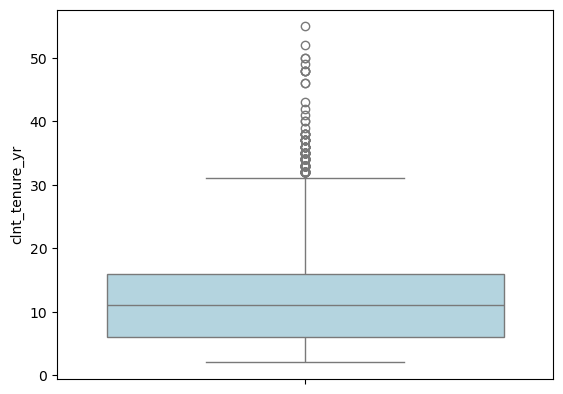

In [16]:
sns.boxplot(data = logon_group_9['clnt_tenure_yr'], color="lightblue")

In [17]:
top_logon_threshold = client_prof['logons_6_mnth'].quantile(0.75)  # Example: Top 25% logon frequency
primary_clients = client_prof[client_prof['logons_6_mnth'] >= top_logon_threshold]

primary_clients

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
0,836976,6.0,73.0,60.5,U,2.0,45105.30,6.0,9.0
1,2304905,7.0,94.0,58.0,U,2.0,110860.30,6.0,9.0
2,1439522,5.0,64.0,32.0,U,2.0,52467.79,6.0,9.0
9,8198645,15.0,189.0,54.5,F,2.0,382303.83,6.0,9.0
11,2537139,8.0,99.0,51.5,U,2.0,135940.68,6.0,9.0
...,...,...,...,...,...,...,...,...,...
70575,8650568,11.0,135.0,26.0,M,3.0,81293.54,7.0,7.0
70577,4324637,9.0,108.0,37.0,M,2.0,60768.46,7.0,7.0
70581,2184810,23.0,286.0,75.5,M,4.0,2496314.67,7.0,7.0
70586,8057076,10.0,120.0,24.5,F,2.0,68218.85,7.0,7.0
